Takes the initial left and right images, rectifies them according to the given camera caliberation data.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import matplotlib.pyplot as plt

left = cv2.imread("/content/drive/MyDrive/Projects/Viga Assignment/View1.png")
left = cv2.cvtColor(left, cv2.COLOR_BGR2RGB)

right = cv2.imread("/content/drive/MyDrive/Projects/Viga Assignment/View2.png")
right = cv2.cvtColor(right, cv2.COLOR_BGR2RGB)

In [ ]:
left[2,2]

array([154, 154, 155], dtype=uint8)

In [ ]:
a = 150
b = 195
maskL = cv2.inRange(left, (a,a,a), (b,b,b))
maskL = cv2.bitwise_not(maskL)
maskR = cv2.inRange(right, (a,a,a), (b,b,b))
maskR = cv2.bitwise_not(maskR)

#left = cv2.bitwise_and(left, left, mask=maskL)
#right = cv2.bitwise_and(right, right, mask=maskR)

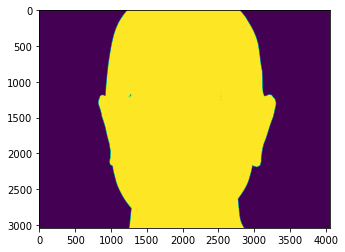

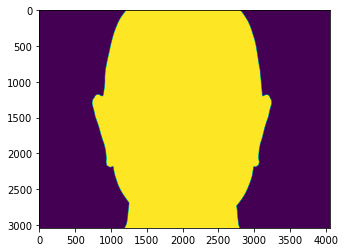

In [ ]:
plt.imshow(maskR)
plt.show()
plt.imshow(maskL)

In [ ]:
import numpy as np

K = np.array([[4876.8, 0, 2032],
     [0, 4876.8, 1520],
     [0, 0, 1]])

Rl = np.array([[0.990721, 0.00393774, -0.135854],
			[-0.00406891, 0.999991, 0.000687881],
			[0.13585, -0.00123427, 0.990729]])

Tl =  np.array([-0.639768,-0.00425937,-0.0355112])
 
Rr = np.array([[0.998179, 0.00217893, -0.0602765],
			[-0.00220042, 0.9999980000000001, 0.000290223],
			[0.0602758, -0.000422328, 0.998182]])

Tr = np.array([-0.267663,-0.00128758,-0.0993487])

In [ ]:
baseline = Tr - Tl
sinAlpha = baseline[2]/np.linalg.norm(baseline)
sinBeta = baseline[1]/np.linalg.norm(baseline[:2])
cosAlpha = np.sqrt(1-sinAlpha*sinAlpha)
cosBeta = np.sqrt(1-sinBeta*sinBeta)

RyAlpha = np.array([[cosAlpha, 0, sinAlpha], [0, 1, 0], [-sinAlpha, 0, cosAlpha]])
RzBeta = np.array([[cosBeta, -sinBeta, 0], [sinBeta, cosBeta, 0], [0, 0, 1]])

In [ ]:
LnewFL = np.matmul(np.linalg.inv(RyAlpha), np.linalg.inv(RzBeta))
LnewFL

array([[ 0.98557051,  0.00787119,  0.16908227],
       [-0.00798617,  0.99996811,  0.        ],
       [-0.16907688, -0.00135032,  0.98560194]])

In [ ]:
LRR = np.matmul(Rr, np.linalg.inv(Rl))
RnewFR = np.matmul(LnewFL, LRR)
RnewFR

array([[ 9.69911630e-01,  6.42845927e-03,  2.43388831e-01],
       [-6.05799107e-03,  9.99980642e-01, -7.46195628e-04],
       [-2.43381173e-01,  2.05545364e-05,  9.69928979e-01]])

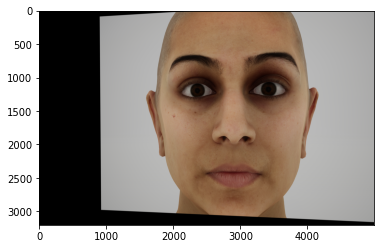

In [ ]:
test = np.matmul(K, np.matmul(LnewFL,np.linalg.inv(K)))
outLeft = cv2.warpPerspective(left, test, (5000,3200))
plt.imshow(outLeft)

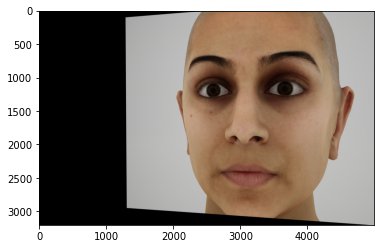

In [ ]:
test = np.matmul(K, np.matmul(RnewFR,np.linalg.inv(K)))
outRight = cv2.warpPerspective(right, test, (5000,3200))
plt.imshow(outRight)

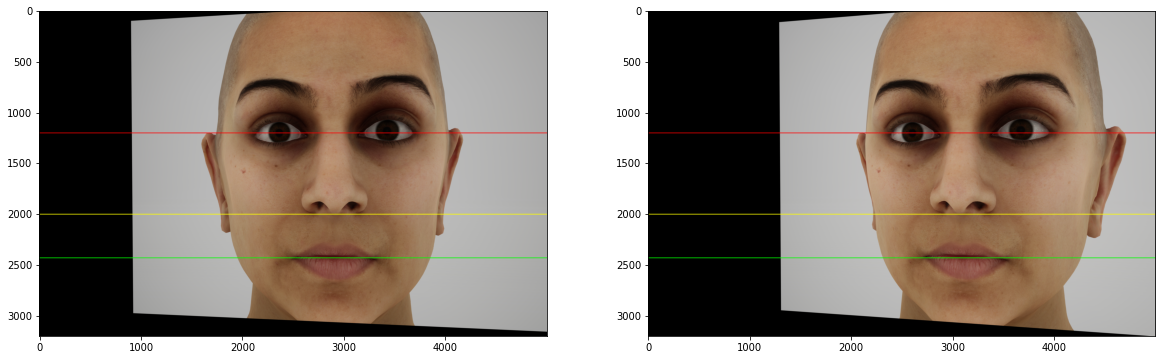

In [ ]:
cv2.line(outLeft,(0,1200),(5000,1200),(255,0,0),5)
cv2.line(outLeft,(0,2000),(5000,2000),(255,255,0),5)
cv2.line(outLeft,(0,2430),(5000,2430),(0,255,0),5)
cv2.line(outRight,(0,1200),(5000,1200),(255,0,0),5)
cv2.line(outRight,(0,2000),(5000,2000),(255,255,0),5)
cv2.line(outRight,(0,2430),(5000,2430),(0,255,0),5)
f = plt.figure(figsize=(20,10))
f.add_subplot(1,2, 1)
plt.imshow(outLeft)
f.add_subplot(1,2, 2)
plt.imshow(outRight)

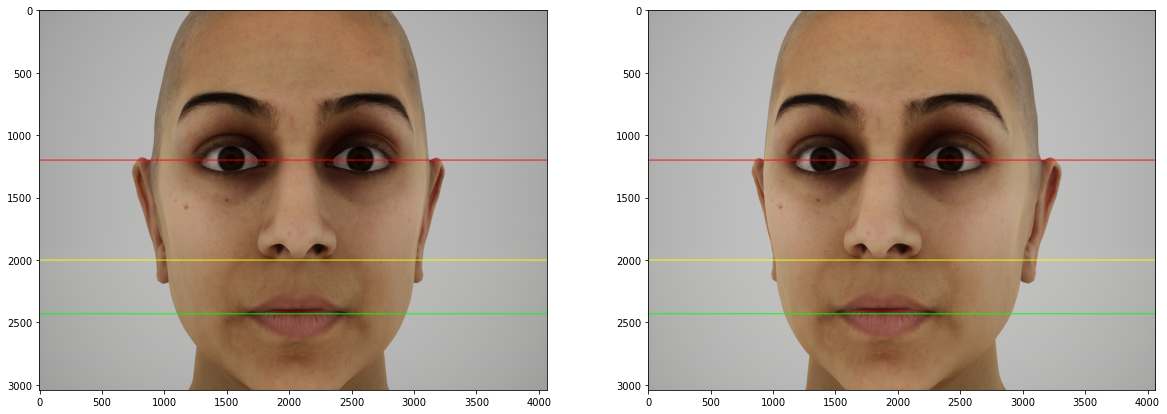

In [ ]:
outLeft = left.copy()
outRight = right.copy()

cv2.line(outLeft,(0,1200),(5000,1200),(255,0,0),5)
cv2.line(outLeft,(0,2000),(5000,2000),(255,255,0),5)
cv2.line(outLeft,(0,2430),(5000,2430),(0,255,0),5)
cv2.line(outRight,(0,1200),(5000,1200),(255,0,0),5)
cv2.line(outRight,(0,2000),(5000,2000),(255,255,0),5)
cv2.line(outRight,(0,2430),(5000,2430),(0,255,0),5)
f = plt.figure(figsize=(20,10))
f.add_subplot(1,2, 1)
plt.imshow(outLeft)
f.add_subplot(1,2, 2)
plt.imshow(outRight)

In [ ]:
R1, R2, P1, P2, Q, roi_left, roi_right = cv2.stereoRectify(K, (), K, (), left.shape[:2], LRR, Tr-Tl, flags=cv2.CALIB_ZERO_DISPARITY)

In [ ]:
height = left.shape[1]
width = left.shape[0]
height,width

(4064, 3040)

In [ ]:
leftMapX, leftMapY = cv2.initUndistortRectifyMap(K, (), R1, P1, (height, width), cv2.CV_32FC1)
left_rectified = cv2.remap(left, leftMapX, leftMapY, cv2.INTER_LINEAR, cv2.BORDER_CONSTANT)

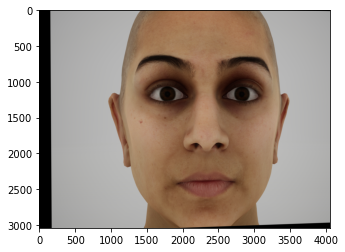

In [ ]:
plt.imshow(left_rectified)

In [ ]:
rightMapX, rightMapY = cv2.initUndistortRectifyMap(K, (), R2, P2, (height, width), cv2.CV_32FC1)
right_rectified = cv2.remap(right, rightMapX, rightMapY, cv2.INTER_LINEAR, cv2.BORDER_CONSTANT)

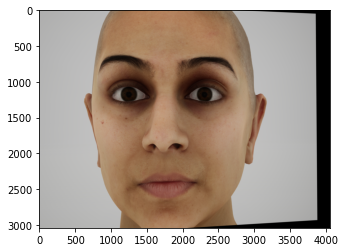

In [ ]:
plt.imshow(right_rectified)

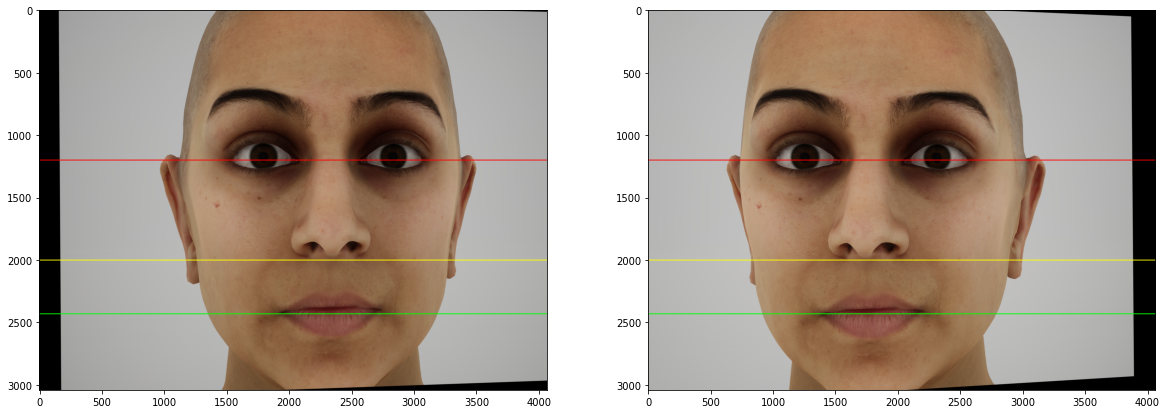

In [ ]:
outLeft = left_rectified.copy()
outRight = right_rectified.copy()

cv2.line(outLeft,(0,1200),(5000,1200),(255,0,0),5)
cv2.line(outLeft,(0,2000),(5000,2000),(255,255,0),5)
cv2.line(outLeft,(0,2430),(5000,2430),(0,255,0),5)
cv2.line(outRight,(0,1200),(5000,1200),(255,0,0),5)
cv2.line(outRight,(0,2000),(5000,2000),(255,255,0),5)
cv2.line(outRight,(0,2430),(5000,2430),(0,255,0),5)
f = plt.figure(figsize=(20,10))
f.add_subplot(1,2, 1)
plt.imshow(outLeft)
f.add_subplot(1,2, 2)
plt.imshow(outRight)

In [ ]:
cv2.imwrite("/content/drive/MyDrive/Projects/Viga Assignment/undLeft.png", left_rectified)
cv2.imwrite("/content/drive/MyDrive/Projects/Viga Assignment/undRight.png", right_rectified)

True